<a href="https://colab.research.google.com/github/nawaltahir/DEN/blob/main/Customer_Churn_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
# prompt: upload 2 csv files from the computer and store in training_data and testing_data

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

import io
training_data = pd.read_csv(io.BytesIO(uploaded['customer_churn_dataset-training-master.csv']))
testing_data = pd.read_csv(io.BytesIO(uploaded['customer_churn_dataset-testing-master.csv']))


Saving customer_churn_dataset-testing-master.csv to customer_churn_dataset-testing-master (3).csv
Saving customer_churn_dataset-training-master.csv to customer_churn_dataset-training-master (3).csv
User uploaded file "customer_churn_dataset-testing-master (3).csv" with length 3282220 bytes
User uploaded file "customer_churn_dataset-training-master (3).csv" with length 23448754 bytes


KeyError: 'customer_churn_dataset-training-master.csv'

In [4]:
training_data = pd.read_csv('/content/drive/MyDrive/Datasets/customer_churn_dataset-training-master.csv')
testing_data = pd.read_csv('/content/drive/MyDrive/Datasets/customer_churn_dataset-testing-master.csv')

# Preprocessing

In [5]:
# Features and target variable
X_train = training_data.drop(columns=['Age', 'Gender', 'CustomerID', 'Churn'])
y_train = training_data['Churn']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = testing_data.drop(columns=['Age', 'Gender'])
y_test = testing_data['Churn']


In [6]:
# Check for missing values in y_train
print(y_train.isnull().sum())

1


In [7]:
# Remove rows with NaN values in y_train
X_train = X_train[~y_train.isnull()]
y_train = y_train[~y_train.isnull()]


In [8]:
X_train['Subscription Type'] = X_train['Subscription Type'].replace({ 'Basic': 0, 'Standard': 1, 'Premium': 2})
X_train['Contract Length'] = X_train['Contract Length'].replace({ 'Quarterly': 0, 'Monthly': 1, 'Annual': 2})
X_train.head()

<ipython-input-8-390790f476b1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['Subscription Type'] = X_train['Subscription Type'].replace({ 'Basic': 0, 'Standard': 1, 'Premium': 2})
<ipython-input-8-390790f476b1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['Contract Length'] = X_train['Contract Length'].replace({ 'Quarterly': 0, 'Monthly': 1, 'Annual': 2})


,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,39.0,14.0,5.0,18.0,1,2,932.0,17.0
1,49.0,1.0,10.0,8.0,0,1,557.0,6.0
2,14.0,4.0,6.0,18.0,0,0,185.0,3.0
3,38.0,21.0,7.0,7.0,1,1,396.0,29.0
4,32.0,20.0,5.0,8.0,0,1,617.0,20.0


In [9]:
X_test['Subscription Type'] = X_test['Subscription Type'].replace({ 'Basic': 0, 'Standard': 1, 'Premium': 2})
X_test['Contract Length'] = X_test['Contract Length'].replace({ 'Quarterly': 0, 'Monthly': 1, 'Annual': 2})
X_test.head()

<ipython-input-9-df1d804ae0e8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['Subscription Type'] = X_test['Subscription Type'].replace({ 'Basic': 0, 'Standard': 1, 'Premium': 2})
<ipython-input-9-df1d804ae0e8>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['Contract Length'] = X_test['Contract Length'].replace({ 'Quarterly': 0, 'Monthly': 1, 'Annual': 2})


,CustomerID,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,25,14,4,27,0,1,598,9,1
1,2,28,28,7,13,1,1,584,20,0
2,3,27,10,2,29,2,2,757,21,0
3,4,9,12,5,17,2,0,232,18,0
4,5,58,24,9,2,1,2,533,18,0


In [10]:
# Drop rows with missing values
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]


In [11]:
# Drop the 'Churn' column from X_test
X_test = X_test.drop(columns=['Churn', 'CustomerID'])

In [12]:
numeric_features = ['Tenure','Usage Frequency','Support Calls',	'Payment Delay',	'Total Spend',	'Last Interaction']
categorical_features = ['Subscription Type', 'Contract Length']

In [13]:
# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Model Training and Evaluation

In [14]:
#from sklearn.preprocessing import PolynomialFeatures
# Combine all transformers into a preprocessor using ColumnTransformer
#preprocessor = ColumnTransformer(
    #transformers=[
       # ('num', numeric_transformer, numeric_features),
       # ('cat', categorical_transformer, categorical_features)
    #])

from sklearn.feature_selection import SelectKBest, f_classif

# Select top 10 features based on ANOVA F-value
preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', SimpleImputer(strategy='median')),
                      ('scaler', MinMaxScaler()),
                      ('selectkbest', SelectKBest(score_func=f_classif, k=4))]), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])
# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(max_iter=1000, C=0.00000001, solver='newton-cg', class_weight='balanced'), )])
# Fit the pipeline to the training data
log_reg = pipeline.fit(X_train, y_train)
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('selectkbest',
                                                                   SelectKBest(k=4))]),
                                                  ['Tenure', 'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Subscription Type',
                                                   'Contract Length'])])),
                ('classifier',
                 LogisticRegression(C=1e-08, class_weight='balanced',
                                    max_iter=1000, solver='newton-cg'))])

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Mean cross-validation accuracy: {scores.mean()}")

Mean cross-validation accuracy: 0.843883843170433


In [16]:
# print train and test set shape
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# generate predictions
y_pred_lr = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# test accuracy on X_test
from sklearn.metrics import accuracy_score
print(f"LR accuracy ", accuracy_score(y_test,y_pred_lr))

X_train: (440832, 8)
X_test: (64374, 8)
y_train: (440832,)
y_test: (64374,)
LR accuracy  0.6346351011277845


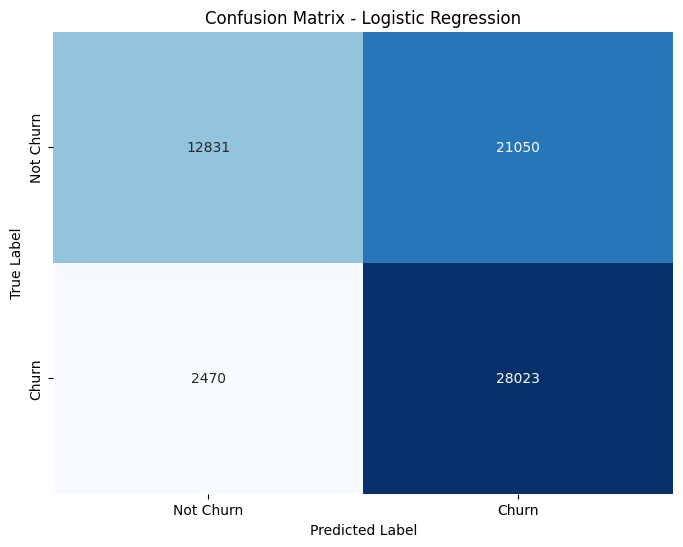

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [19]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=5, min_samples_leaf=10, max_features= None, n_jobs=-1, class_weight='balanced'))])

# Train the model
rf_clf = pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_tuned = pipeline.predict(X_test)

# Evaluate
print("RF Accuracy after manual tuning:", accuracy_score(y_test, y_pred_rf_tuned))
pipeline


RF Accuracy after manual tuning: 0.5493522229471526


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('selectkbest',
                                                                   SelectKBest(k=4))]),
                                                  ['Tenure', 'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Subscription Type',
                                                   'Contract Length'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        max_features=None, min_samples_leaf=10,
                                        min_samples_split=5, n_estimators=500,
                                        n_jobs=-1))])

In [20]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_dist = {
    'n_estimators': [1000],             # Number of trees
    'max_depth': [10, 20, 30],                   # Maximum depth of the tree
    'min_samples_split': [10],                   # Minimum number of samples required to split a node
    'min_samples_leaf': [20],                 # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],    # Number of features to consider for the best split
    'bootstrap': [True, False]                         # Whether bootstrap samples are used when building trees
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=param_dist,
                                   n_iter=10,    # Number of parameter settings sampled
                                   cv=5,         # 5-fold cross-validation
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)    # Use all available cores

# Fit the randomized search
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found by RandomizedSearchCV:", random_search.best_params_)

# Use the best model to predict
y_pred_rf_tuned = random_search.best_estimator_.predict(X_test)

# Evaluate the model
print("RF Accuracy after tuning:", accuracy_score(y_test, y_pred_rf_tuned))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", li

Best parameters found by RandomizedSearchCV: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
RF Accuracy after tuning: 0.5436511635132196


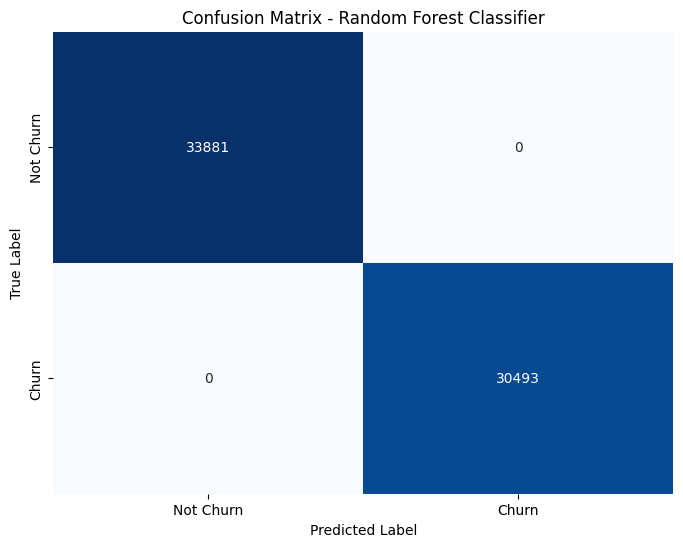

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_tuned)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Model Deployment

In [ ]:
!pip install dash pandas dash-table scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 39.0 MB/s eta 0:00:00


In [ ]:
import pickle
# Save the model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

#import joblib

# Save Random Forest model
#joblib.dump(rf_clf, 'random_forest_model.pkl')


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pickle
import dash_table

# Load the saved Random Forest model (assuming the model is saved as 'rf_clf_model.pkl')
def load_model():
    with open('random_forest_model.pkl', 'rb') as f:
        model = pickle.load(f)
    return model

# Load the model
model = load_model()

# Create the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Customer Churn Prediction App"),
    html.Label("Upload Testing Data (CSV)"),
    dcc.Upload(
        id='upload-data',
        children=html.Button('Upload File'),
        multiple=False
    ),
    dash_table.DataTable(id='output-data-table'),
    html.Div(id='output-predictions'),
    html.Div(id='warning-message', style={'color': 'red', 'font-weight': 'bold'})
])

def parse_contents(contents, filename):
    # Read the uploaded CSV content
    content_type, content_string = contents.split(',')
    decoded = base64.b64decode(content_string)
    try:
        if 'csv' in filename:
            df = pd.read_csv(io.StringIO(decoded.decode('utf-8')))
        return df
    except Exception as e:
        return None

@app.callback(
    [Output('output-data-table', 'data'),
     Output('output-data-table', 'columns'),
     Output('output-predictions', 'children'),
     Output('warning-message', 'children')],
    [Input('upload-data', 'contents')],
    [State('upload-data', 'filename')]
)
def update_output(contents, filename):
    if contents is not None:
        df = parse_contents(contents, filename)

        # Drop the target column 'Churn' if it exists in test data
        if 'Churn' in df.columns:
            X_test = df.drop(columns=['Churn'])
        else:
            X_test = df

        # Make predictions
        predictions = model.predict(X_test)
        df['Predictions'] = predictions

        # Prepare data table for display
        columns = [{"name": i, "id": i} for i in df.columns]

        # Check if any customer is predicted to churn
        churn_customers = predictions[predictions == 1].size
        total_customers = predictions.size

        # Show warning if there are churn predictions
        warning = ""
        if churn_customers > 0:
            warning = f"Warning: {churn_customers} out of {total_customers} customers are predicted to churn!"
        else:
            warning = "No customers are predicted to churn."

        return df.to_dict('records'), columns, "", warning

    return [], [], "", ""

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
import joblib  # For loading the saved model
import base64
import io
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Load the pre-trained Random Forest model
rf_clf = joblib.load('random_forest_model.pkl')

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout for the Dash app
app.layout = html.Div([
    html.H1("Customer Churn Prediction using Pre-Trained Random Forest"),

    # File upload component for testing data
    html.H2("Upload Testing Data (CSV)"),
    dcc.Upload(
        id='upload-testing-data',
        children=html.Div(['Drag and Drop or ', html.A('Select Files')]),
        style={
            'width': '98%',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
            'margin': '10px'
        },
        multiple=False
    ),

    # Button to trigger prediction
    html.Button('Predict', id='predict-button', n_clicks=0),

    # Div for displaying output
    html.Div(id='output-div')
])

# Helper function to parse uploaded CSV files
def parse_contents(contents):
    content_type, content_string = contents.split(',')
    decoded = base64.b64decode(content_string)
    try:
        df = pd.read_csv(io.StringIO(decoded.decode('utf-8')))
        return df
    except Exception as e:
        return None

# Preprocessing function for the input data
def preprocess_data(test_data):
    # Define preprocessing pipeline
    preprocessor = ColumnTransformer([
        ('num', MinMaxScaler(), ['Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']),
        ('cat', OneHotEncoder(), ['Subscription Type', 'Contract Length'])
    ])

    # Apply preprocessing to the test data
    X_test_preprocessed = preprocessor.fit_transform(test_data)
    return X_test_preprocessed

# Callback for processing testing data and making predictions
@app.callback(
    Output('output-div', 'children'),
    [Input('predict-button', 'n_clicks')],
    [State('upload-testing-data', 'contents')]
)
def predict_churn(n_clicks, testing_data):
    if n_clicks > 0:
        if testing_data is None:
            return "Error: Please upload testing data."

        # Parse the uploaded file
        test_df = parse_contents(testing_data)
        if test_df is None:
            return "Error: There was an issue reading the file. Please check your CSV format."

        # Drop the 'Churn' column if it exists in the test set (since it's the target)
        if 'Churn' in test_df.columns:
            test_df = test_df.drop(columns=['Churn'])

        # Preprocess the test data
        X_test = preprocess_data(test_df)

        # Use the pre-trained model to make predictions
        predictions = rf_clf.predict(X_test)

        # Show results
        return f"Predictions: {predictions}"

    return "Waiting for prediction..."

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import base64
import io
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
import dash_table

# Load the saved Random Forest model (assuming the model is saved as 'rf_clf_model.pkl')
def load_model():
    with open('random_forest_model.pkl', 'rb') as f:
        model = pickle.load(f)
    return model


# Load the model
model = load_model()

# Create the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Customer Churn Prediction App"),
    html.Label("Upload Testing Data (CSV)"),
    dcc.Upload(
        id='upload-data',
        children=html.Button('Upload File'),
        multiple=False
    ),
    dash_table.DataTable(id='output-data-table'),
    html.Div(id='output-predictions'),
    html.Div(id='warning-message', style={'color': 'red', 'font-weight': 'bold'})
])

def parse_contents(contents, filename):
    """Function to decode and parse uploaded file."""
    content_type, content_string = contents.split(',')
    decoded = base64.b64decode(content_string)
    try:
        if 'csv' in filename:
            df = pd.read_csv(io.StringIO(decoded.decode('utf-8')))
        return df
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

@app.callback(
    [Output('output-data-table', 'data'),
     Output('output-data-table', 'columns'),
     Output('output-predictions', 'children'),
     Output('warning-message', 'children')],
    [Input('upload-data', 'contents')],
    [State('upload-data', 'filename')]
)
def update_output(contents, filename):
    if contents is not None:
        df = parse_contents(contents, filename)

        if df is None or df.empty:
            return [], [], "Error: The file is empty or could not be read.", ""

        # Drop the target column 'Churn' if it exists in test data
        if 'Churn' in df.columns:
            X_test = df.drop(columns=['Churn'])
        else:
            X_test = df

        # Ensure necessary columns are there, otherwise handle missing columns
        expected_columns = ['Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Subscription Type', 'Contract Length']
        missing_columns = set(expected_columns) - set(X_test.columns)
        if missing_columns:
            return [], [], f"Error: Missing columns: {missing_columns}", ""

        try:
            # Make predictions
            predictions = model.predict(X_test)
            df['Predictions'] = predictions

            # Prepare data table for display
            columns = [{"name": i, "id": i} for i in df.columns]

            # Check if any customer is predicted to churn
            churn_customers = (predictions == 1).sum()
            total_customers = len(predictions)

            # Show warning if there are churn predictions
            warning = ""
            if churn_customers > 0:
                warning = f"Warning: {churn_customers} out of {total_customers} customers are predicted to churn!"
            else:
                warning = "No customers are predicted to churn."

            return df.to_dict('records'), columns, "Prediction complete.", warning
        except Exception as e:
            return [], [], f"Error during prediction: {e}", ""
    return [], [], "", ""

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>